In [20]:
import pandas as pd 
import numpy as np

In [8]:
# Dealing with categorical Features
## scikitlearn will not accept categorical features by default 
## need to encode categorical features numerically 
## convert to dummy variables 
### 0 : Observation was NOT that category 
### 1 : Observation was that category 
#### we achieve this by using scikit-learn : One Hot Encoder()
#### in pandas : get_dummies()


# Example which is not runnable as we dont have ds 
df = pd.read_csv('auto.csv')
df_origin = pd.get_dummies(df)
print(df_origin.head())
df_origin = df_origin.drop('origin_Asia', axis=1)
print(df_origin.head())

    mpg  displ   hp  weight  accel  size  origin_Asia  origin_Europe  \
0  18.0  250.0   88    3139   14.5  15.0            0              0   
1   9.0  304.0  193    4732   18.5  20.0            0              0   
2  36.1   91.0   60    1800   16.4  10.0            1              0   
3  18.5  250.0   98    3525   19.0  15.0            0              0   
4  34.3   97.0   78    2188   15.8  10.0            0              1   

   origin_US  
0          1  
1          1  
2          0  
3          1  
4          0  
    mpg  displ   hp  weight  accel  size  origin_Europe  origin_US
0  18.0  250.0   88    3139   14.5  15.0              0          1
1   9.0  304.0  193    4732   18.5  20.0              0          1
2  36.1   91.0   60    1800   16.4  10.0              0          0
3  18.5  250.0   98    3525   19.0  15.0              0          1
4  34.3   97.0   78    2188   15.8  10.0              1          0


NameError: name 'plot' is not defined

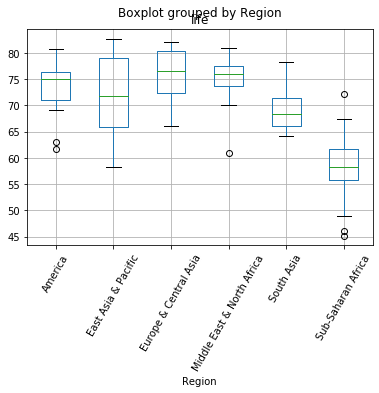

In [3]:
# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plot.show()


In [4]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')


In [5]:
# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [2]:
#HANDLING MISSING DATA
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.insulin.replace(0,np.nan, inplace=True)
df.triceps.replace(0,np.nan, inplace=True)
df.bmi.replace(0,np.nan, inplace=True)
df.info()

AttributeError: 'DataFrame' object has no attribute 'insulin'

In [7]:
# drop all rows containing missing data
df = df.dropna()
df.shape
# we lost half of the data 

(393, 9)

In [8]:
#impute missing data 
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values ='NaN', strategy = 'mean', axis=0)
imp.fit(X)
X=imp.transform(X)

In [10]:
#preloaded ex wont run 
# Convert '?' to NaN
#df[df == '?'] = np.nan

# Print the number of NaNs
#print(df.isnull().sum())

# Print shape of original DataFrame
#print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
#df = df.dropna()

# Print shape of new DataFrame
#print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


In [ ]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train,y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

In [14]:
##Centering and scaling 
df = pd.read_csv('red_wine_quality.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [1]:
# Why Scale/Center your data?
## Many models use some sort of distance to inform them 
## Features on largwer scales can unduly influence the model
## Example: k NN uses distance explicitly when making predictions
## We want features to be on similar scale


In [2]:
#Ways  to normalize data 
## Standardization : Subtract the mean and divide by teh variance
## All features are centered around zero and have one variance one

## Method 2 : can also subtract ythe minimum and divide by the range 
## Minimu0 and max 1

## we can also do from -1 to 1

In [16]:
#Scaling in scikit-learn 
from sklearn.preprocessing import scale
X_scaled = scale(df['fixed_acidity'])

In [17]:
np.mean(df['fixed_acidity']), np.std(df['fixed_acidity'])

(8.319637273295838, 1.7405518001102782)

In [19]:
np.mean(X_scaled), np.std(X_scaled)

(3.554935513496436e-16, 1.0)

In [21]:
# #Scaling in pipeline 

# from sklearn.preprocessing import StandardScaler
# steps = [('scaler',StandardScaler()),
#         ('knn', KNeighborsClassifier()]
# pipeline= Pipeline(steps)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
# knn_scaled = pipeline.fit(X_train,y_train)
# y_pred= pipeline.predict(X_test)
# accuracy_Score(y_test,y_pred)

In [24]:
# #Crossvalidationa nd scaling in the pipeline 

# # steps = [('scaler',StandardScaler()),
# #         ('knn', KNeighborsClassifier()]
# # pipeline= Pipeline(steps)

# parameters ={knn__n_neighbors=np.arrange(1,50)}

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_Size = 0.2, random_State = 21)
# cv = GridSearchCV(pipeline, param_grid = parameters)

# cv.fit(X_train,y_train)
# y_pred = cv.predict(X_test)

# print(cv.best_params_)
# print(cv.score(X_test, y_test))
# print(Calssification_report(y_test,y_pred))

In [25]:
y= df['quality']
X= df.drop('quality',axis=1).values

In [28]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)


# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)


# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))

Accuracy with Scaling: 0.5708333333333333
Accuracy without Scaling: 0.48541666666666666


In [34]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV (pipeline, param_grid=parameters, cv=3)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.60625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.62      0.79      0.69       127
           6       0.57      0.63      0.60       131
           7       0.75      0.29      0.41        42
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.32      0.28      0.28       320
weighted avg       0.58      0.61      0.57       320

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
from sklearn.linear_model import ElasticNet

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline =  Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train,y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

SyntaxError: invalid syntax (<ipython-input-39-3cf83e6d6684>, line 2)